# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Dataset/Chicago_Airbnb_Sept2023/listings.csv')

#Selecting only the required features from the dataset 
selected_features = ['price', 'accommodates', 'host_response_time', 'bathrooms_text',
                     'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
                     'availability_365', 'number_of_reviews', 'review_scores_rating',
                     'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'amenities', 'room_type', 'property_type',
                     'neighbourhood', 'neighbourhood_cleansed',
                     'latitude', 'longitude']
df = df[selected_features]

# Data Preprocessing 

In [3]:
# Convert 'bathrooms_text' to numeric
df['bathrooms_text'] = df['bathrooms_text'].str.extract(r'(\d+\.*\d*)').astype(float)

In [4]:
df['bathrooms_text']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8523    3.0
8524    2.0
8525    2.0
8526    1.0
8527    3.0
Name: bathrooms_text, Length: 8528, dtype: float64

In [5]:
# Encode categorical variables
label_encoders = {}
for column in ['host_response_time', 'room_type', 'property_type',
               'neighbourhood', 'neighbourhood_cleansed']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

[(' "Smoke alarm"', 8304), (' "Kitchen"', 7783), (' "Carbon monoxide alarm"', 7723), (' "Wifi"', 7519), (' "Hair dryer"', 7287), (' "Essentials"', 7080), (' "Hangers"', 7079), (' "Hot water"', 6930), (' "Iron"', 6877), (' "Cooking basics"', 6827)]


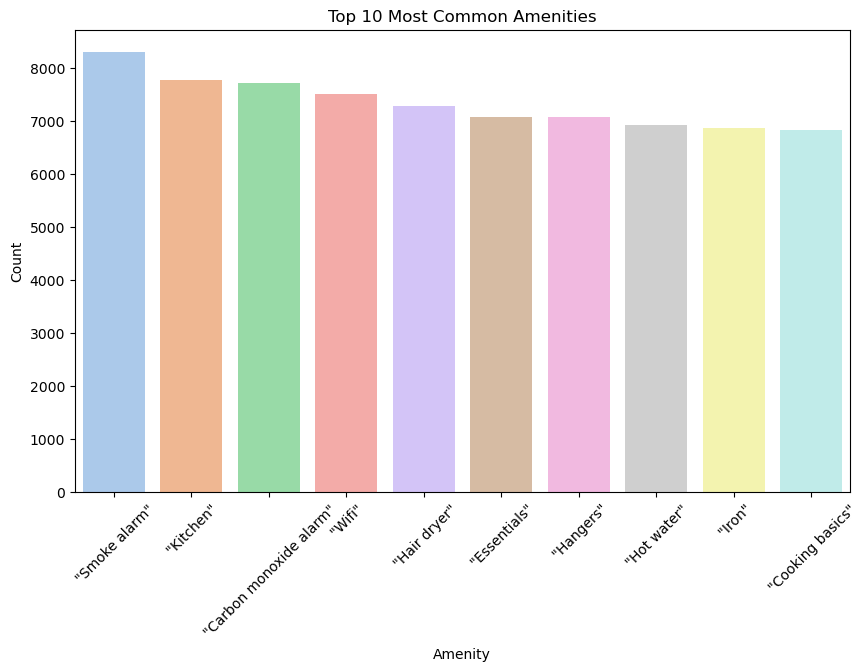

In [6]:
import seaborn as sns

# Define pastel color palette
pastel_palette = sns.color_palette("pastel")

# Most common amenities offered in listings
from collections import Counter
amenities_list = df['amenities'].str.replace('[{}" ]', '').str.split(',')
amenities_counts = Counter([item for sublist in amenities_list for item in sublist])
top_amenities = amenities_counts.most_common(10)
print(top_amenities)

plt.figure(figsize=(10, 6))
sns.barplot(x=[item[0] for item in top_amenities], y=[item[1] for item in top_amenities], palette=pastel_palette)
plt.title('Top 10 Most Common Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Extract amenities count
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))
# Drop 'amenities' column
df.drop(columns=['amenities'], inplace=True)

In [8]:
# Remove '$' and ',' from the 'price' column
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'])

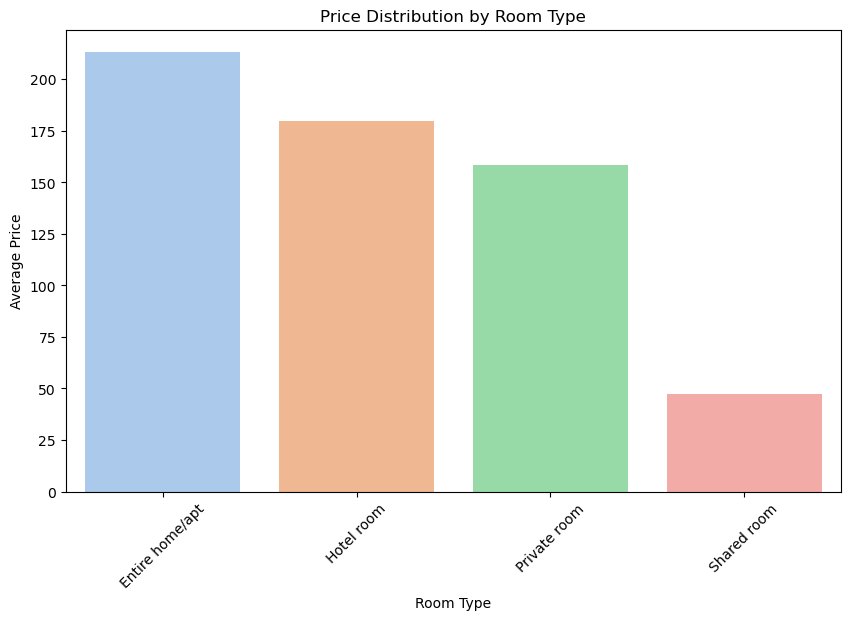

In [9]:
# Define room type labels
room_type_labels = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='room_type', y='price', palette='pastel', errorbar=None)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(ticks=range(len(room_type_labels)), labels=room_type_labels, rotation=45)
plt.show()

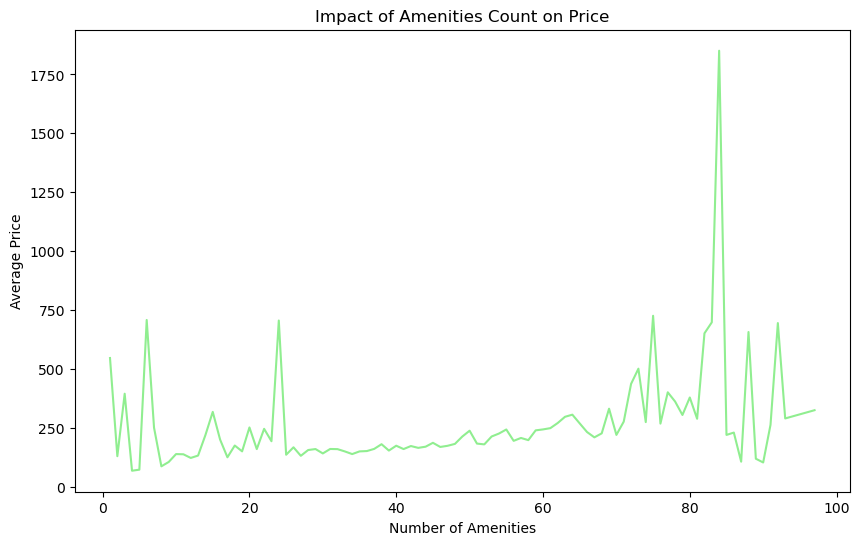

In [10]:
# Impact of specific amenities on listing prices
amenity_prices = df.groupby('amenities_count')['price'].mean()
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=amenity_prices.index, y=amenity_prices.values, color='lightgreen')
plt.title('Impact of Amenities Count on Price')
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.show()


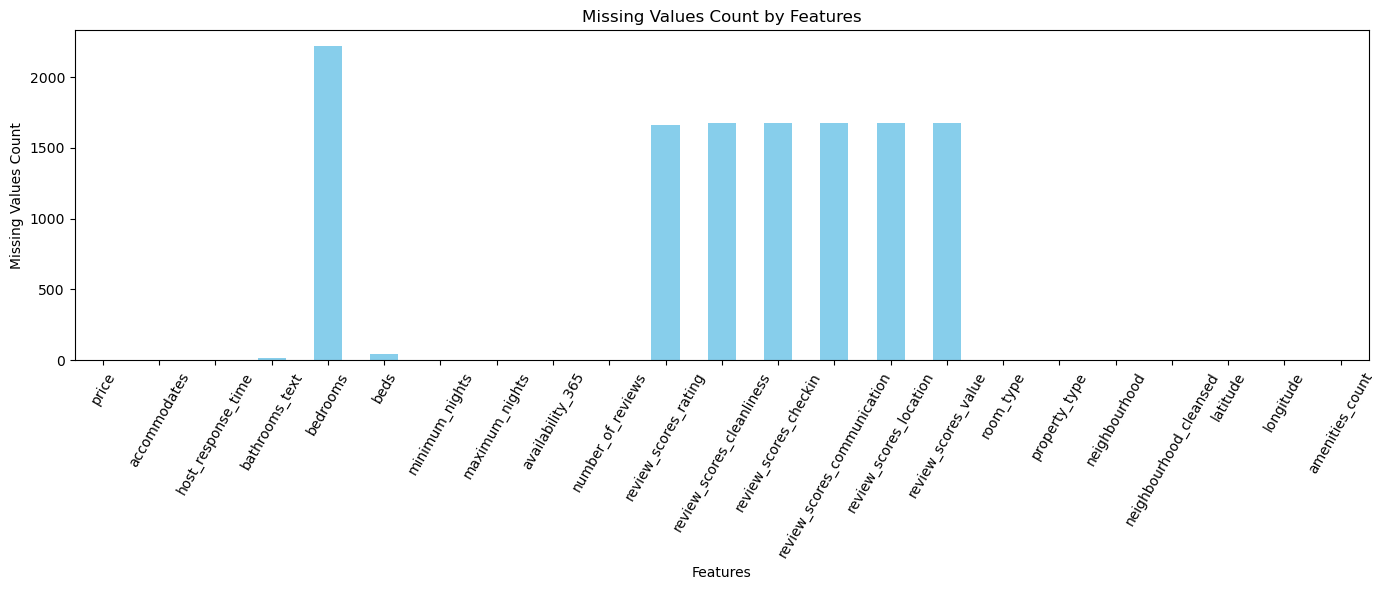

In [11]:
# Plotting missing values count for each column
null_counts = df.isnull().sum()
plt.figure(figsize=(14, 6))  # Adjusted figure size
null_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Features')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=60)  # Increased rotation angle for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Missing values in each column


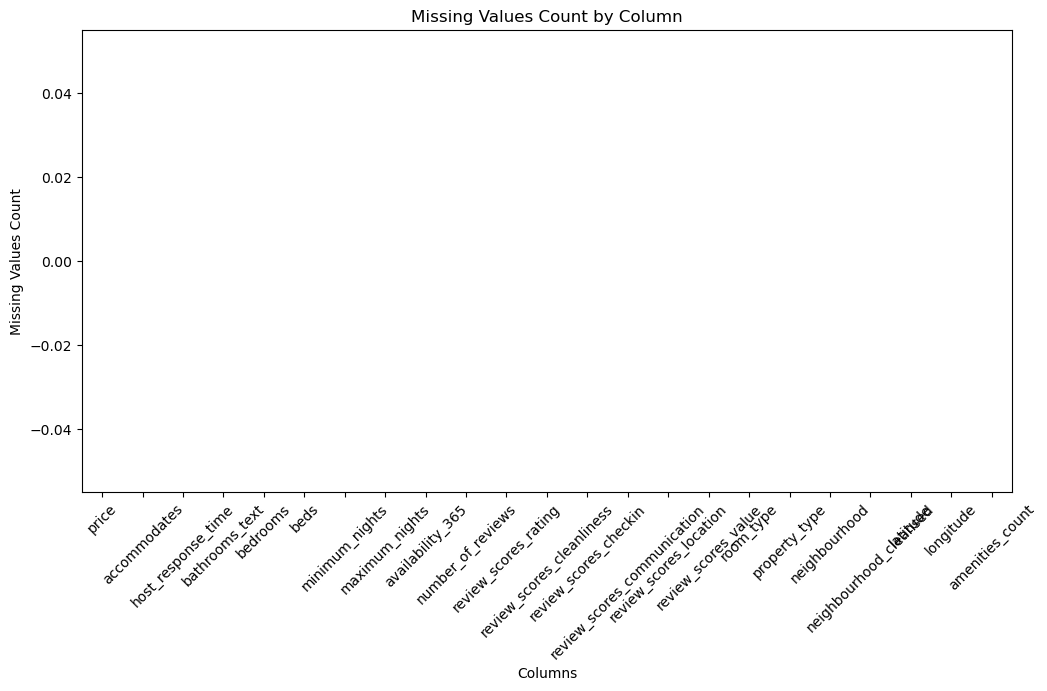

In [12]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value']] = imputer.fit_transform(df[['bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating',
                                                        'review_scores_cleanliness', 'review_scores_checkin',
                                                        'review_scores_communication', 'review_scores_location',
                                                        'review_scores_value']])
print('Missing values in each column')
df.isnull().sum()
# Plotting missing values count for each column
null_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

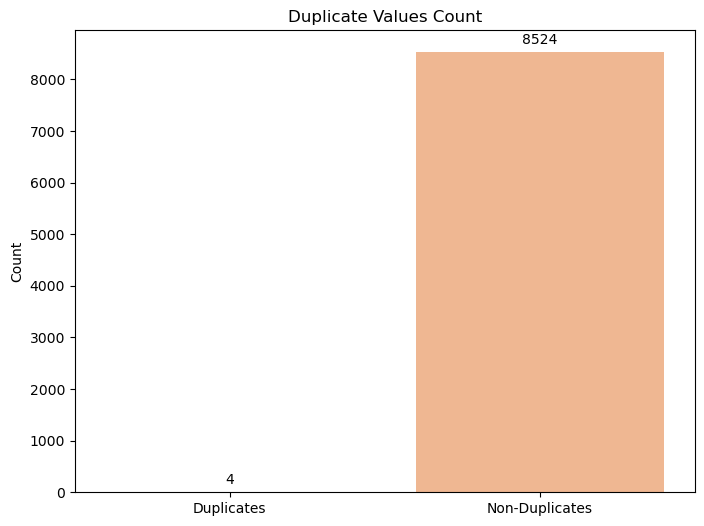

In [13]:
# Calculate duplicate counts
duplicate_counts = df.duplicated().sum()

# Calculate non-duplicate counts
non_duplicate_counts = len(df) - duplicate_counts

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Duplicates', 'Non-Duplicates'], y=[duplicate_counts, non_duplicate_counts], palette='pastel')

# Annotate bars with counts
for i, count in enumerate([duplicate_counts, non_duplicate_counts]):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Set title and labels
plt.title('Duplicate Values Count')
plt.ylabel('Count')

# Show the plot
plt.show()

Number of duplicate rows: 0


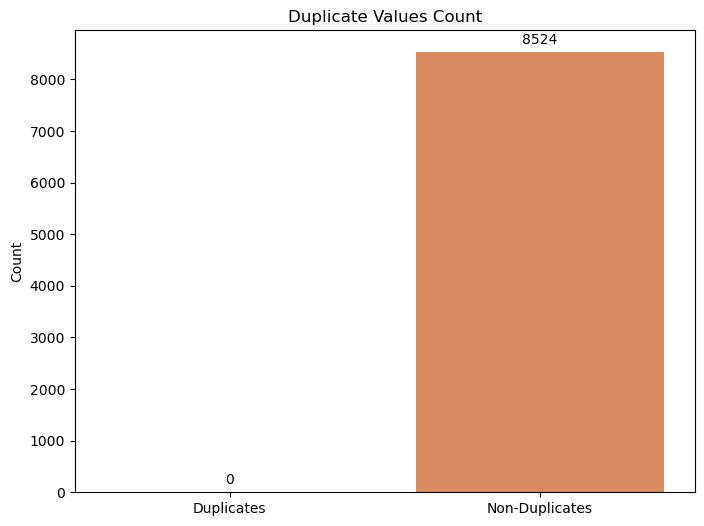

In [14]:
# Remove duplicate rows
df = df.drop_duplicates()
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
# Calculate duplicate counts
duplicate_counts = df.duplicated().sum()

# Calculate non-duplicate counts
non_duplicate_counts = len(df) - duplicate_counts

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Duplicates', 'Non-Duplicates'], y=[duplicate_counts, non_duplicate_counts], palette='muted')

# Annotate bars with counts
for i, count in enumerate([duplicate_counts, non_duplicate_counts]):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Set title and labels
plt.title('Duplicate Values Count')
plt.ylabel('Count')

# Show the plot
plt.show()

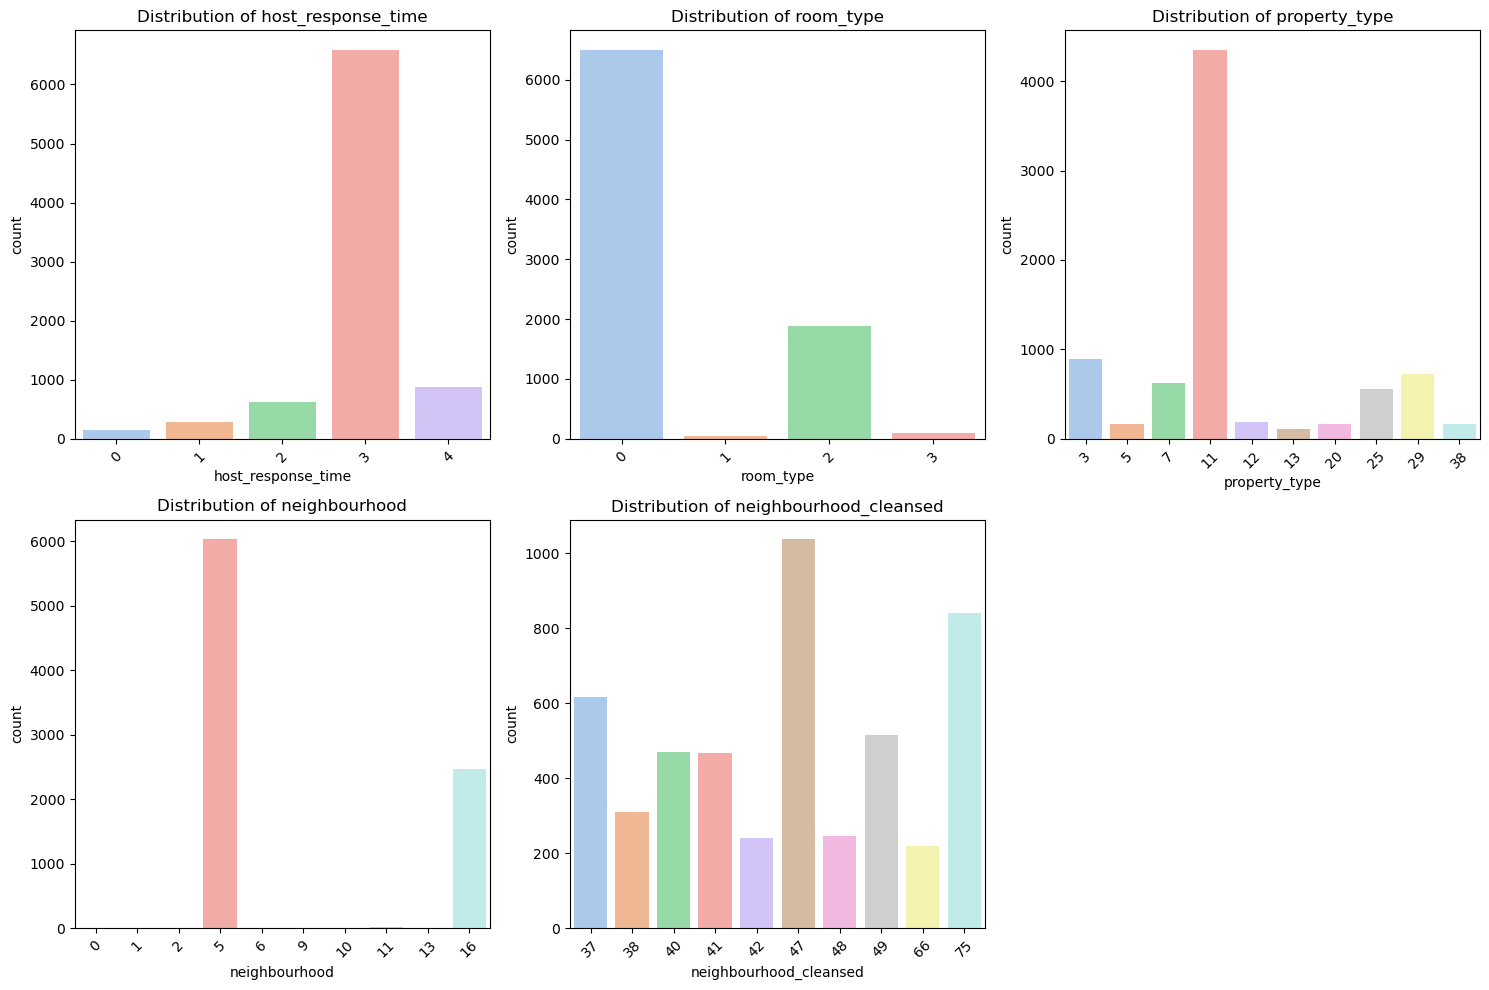

In [15]:
categorical_vars = ['host_response_time', 'room_type', 'property_type', 
                    'neighbourhood', 'neighbourhood_cleansed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    if len(df[col].unique()) > 10:  # Check if the number of unique categories is larger than 10
        top_categories = df[col].value_counts().nlargest(10).index  # Select top 10 categories
        sns.countplot(data=df[df[col].isin(top_categories)], x=col, palette='pastel')
    else:
        sns.countplot(data=df, x=col, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

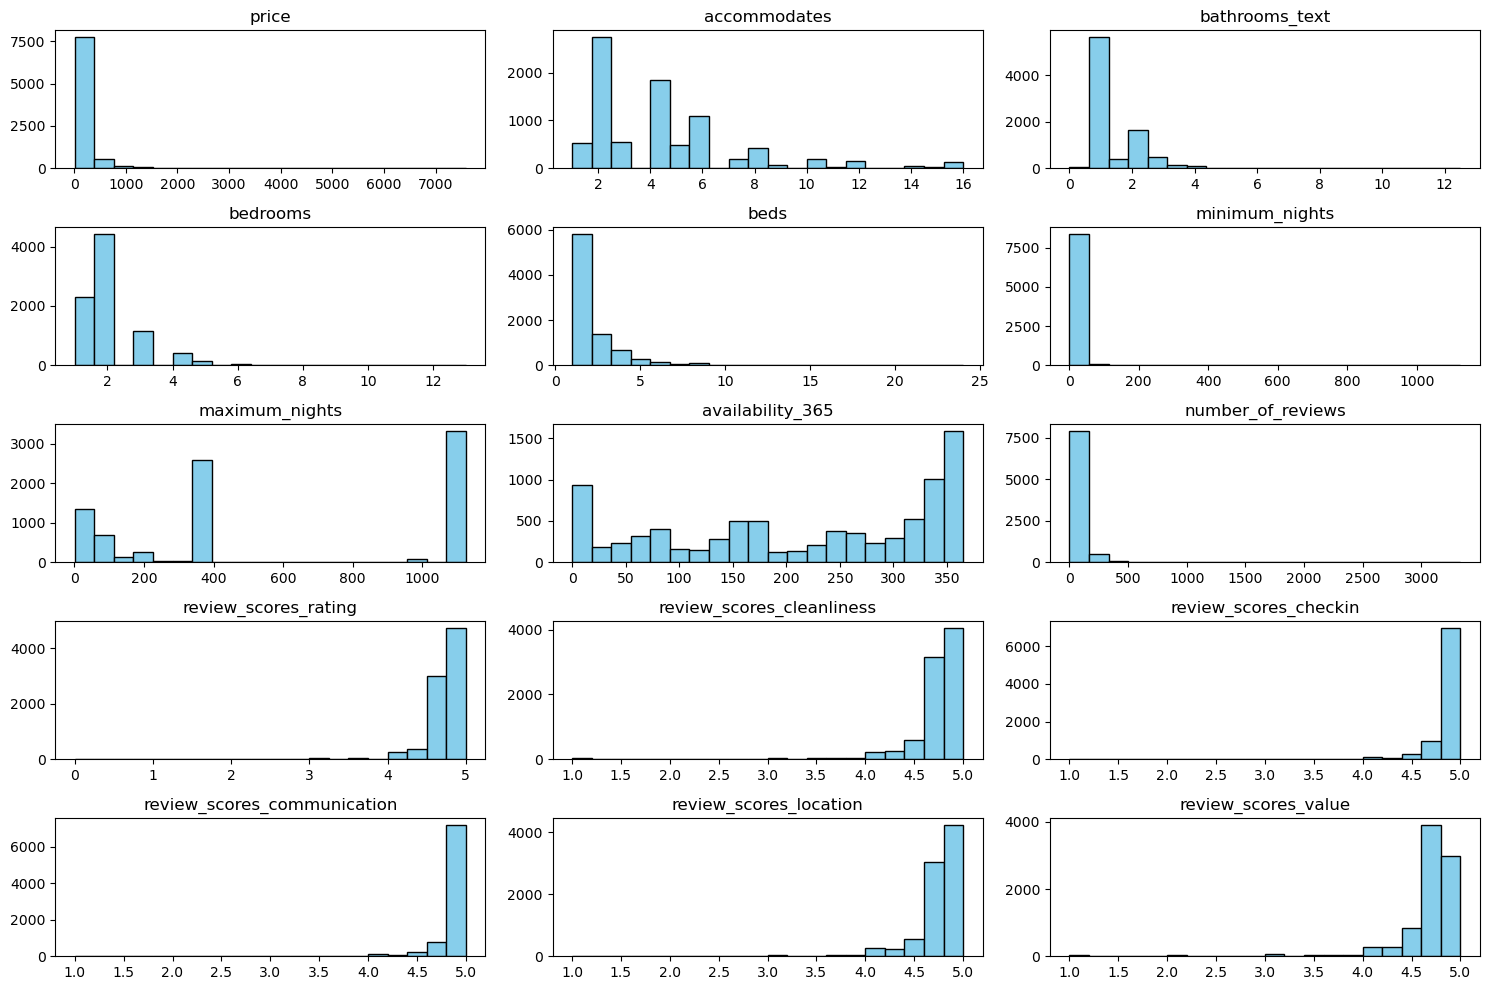

In [16]:
numeric_vars = ['price', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 
                'minimum_nights', 'maximum_nights', 'availability_365', 
                'number_of_reviews', 'review_scores_rating', 
                'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 
                'review_scores_value']

plt.figure(figsize=(15, 10))
df[numeric_vars].hist(bins=20, color='skyblue', edgecolor='black', grid=False, layout=(5, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()


# Feature Engineering

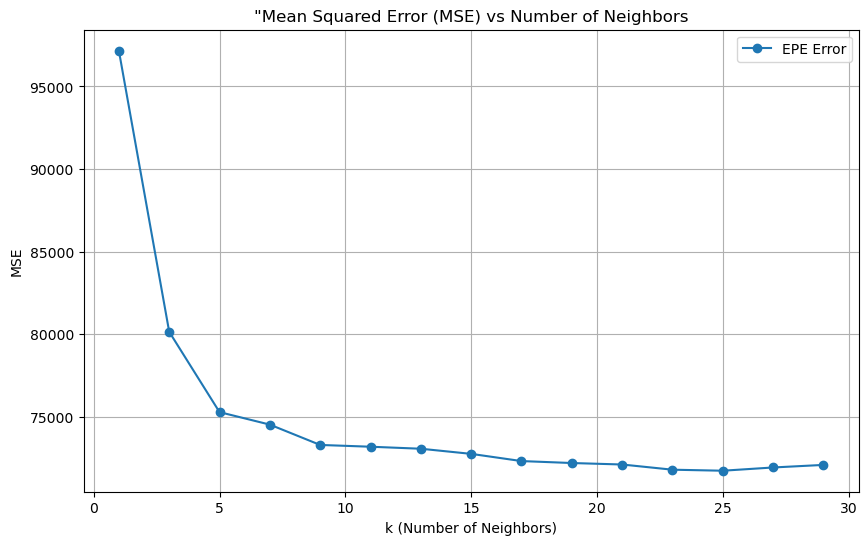

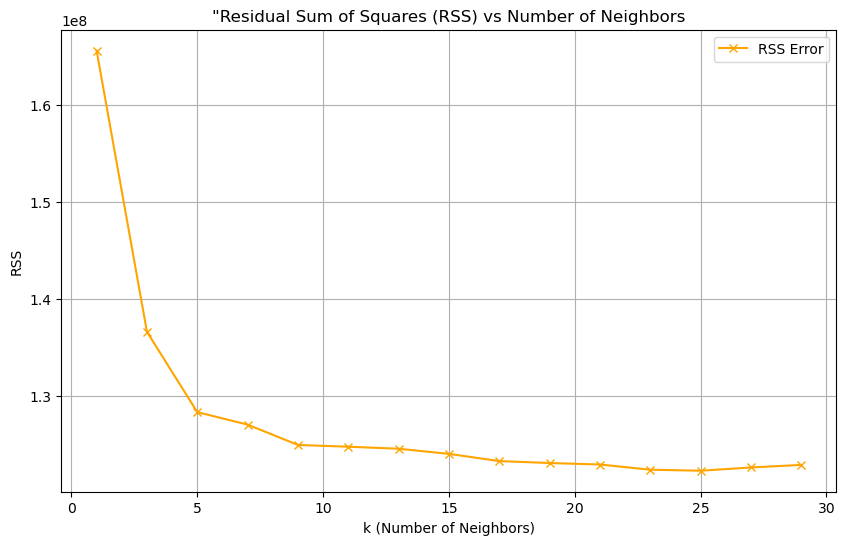

In [17]:
# Function to calculate EPE and RSS using KNN with different k values
def knn_cv_errors(X, y, k_values, n_folds=5):
    kf = KFold(n_splits=n_folds)
    epe_errors = []
    rss_errors = []

    for k in k_values:
        epe_fold_errors = []
        rss_fold_errors = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # KNN model
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Predictions
            y_pred = knn.predict(X_test)

            # Mean Squared Error (MSE)
            mse = np.mean((y_test - y_pred) ** 2)
            rss = np.sum((y_test - y_pred) ** 2)
#             print(mse)
            rss_fold_errors.append(rss)

            # EPE
            epe_fold_errors.append(mse)

        epe_errors.append(np.mean(epe_fold_errors))
        rss_errors.append(np.mean(rss_fold_errors))

    return epe_errors, rss_errors

X_lat_long = df[['latitude', 'longitude']].values  # Convert to NumPy array
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler on the latitude and longitude values
scaler.fit(X_lat_long)
# Normalize latitude and longitude values
X_lat_long = scaler.transform(X_lat_long)

y_lat_long = df['price'].values  # Convert to NumPy array

# Define k values
k_values = range(1, 30, 2)  # Odd k values from 1 to 29
# Calculate errors
epe_errors, rss_errors = knn_cv_errors(X_lat_long, y_lat_long, k_values)


# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, epe_errors, label='EPE Error', marker='o')
plt.title('"Mean Squared Error (MSE) vs Number of Neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

# Plotting RSS
plt.figure(figsize=(10, 6))
plt.plot(k_values, rss_errors, label='RSS Error', marker='x', color='orange')
plt.title('"Residual Sum of Squares (RSS) vs Number of Neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RSS')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Step 1: KNN clustering for latitude and longitude
knn_cluster = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
# X_lat_long = df[['latitude', 'longitude']]
# Scale latitude and longitude separately
# scaler_lat_long = StandardScaler()
# X_lat_long = scaler_lat_long.fit_transform(X_lat_long)

# y_lat_long = df['price']
knn_cluster.fit(X_lat_long, y_lat_long)
cluster_labels = knn_cluster.predict(X_lat_long)

# Add cluster labels to the dataframe
df['cluster_label'] = cluster_labels

# Drop 'latitude' and 'longitude' columns
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [19]:
# Split into features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

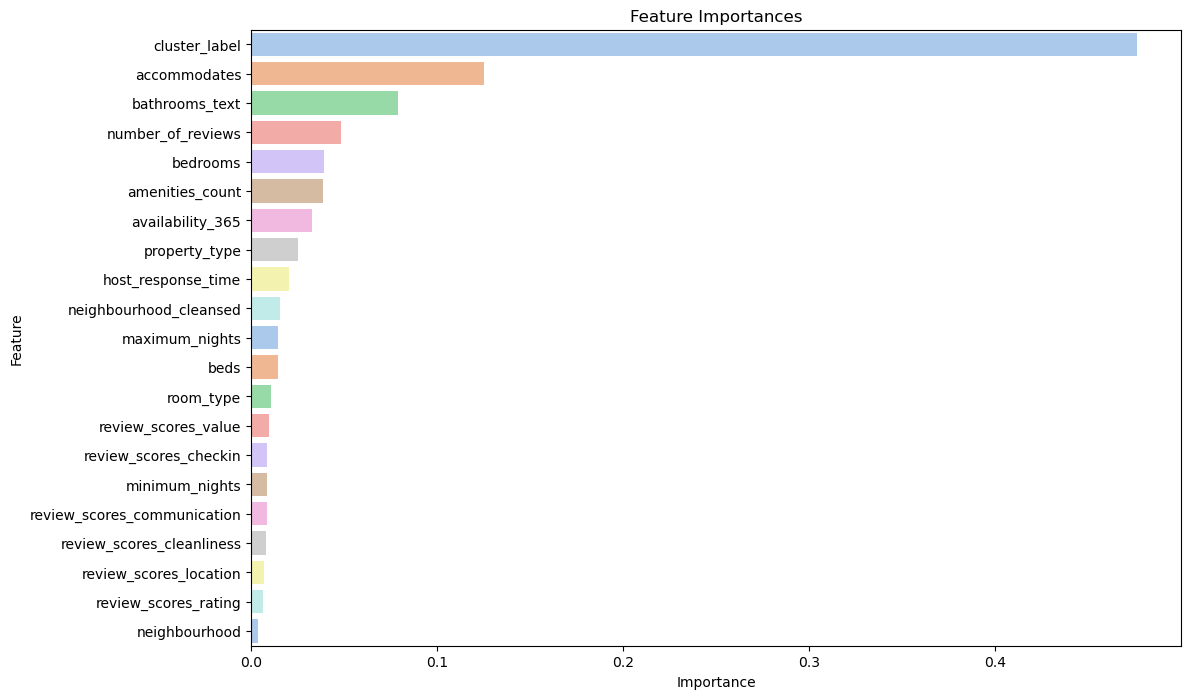

In [20]:
# Train a random forest model to get feature importances
rf = RandomForestRegressor()
rf.fit(X_scaled, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features, palette="pastel")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

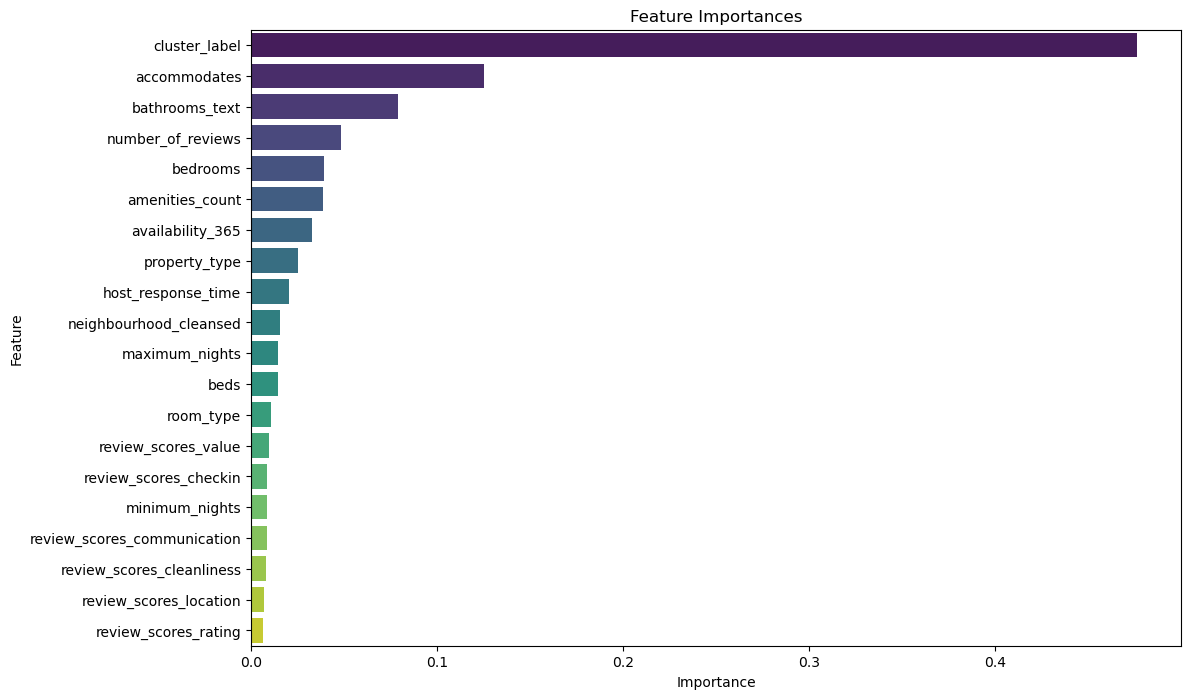

In [21]:
# Remove the last three least important features
top_k = len(sorted_features) - 1
top_features = sorted_features[:top_k]

# Plot feature importances for top features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances[:top_k], y=sorted_features[:top_k], palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [22]:
# Get indices of top features
top_feature_indices = [X.columns.get_loc(feature) for feature in top_features]

# Keep only the top features in X_scaled
X_top_features = X_scaled[:, top_feature_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

In [23]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)

# # Access the coefficients (θ values) of the linear regression model
# theta_values = model.coef_
# intercept = model.intercept_

# print("Coefficients (θ values):", theta_values)
# print("Intercept:", intercept)

# Calculate mean squared error (MSE)
mse_linear = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse_linear)

# Calculate root mean squared error (RMSE)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)
print("Linear Regression RMSE:", rmse_linear)

# Calculate mean absolute error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred)
print("Linear Regression MAE:", mae_linear)

Linear Regression MSE: 18745.065835734466
Linear Regression RMSE: 136.91262117034523
Linear Regression MAE: 76.95563082174621


In [24]:
# Deploy the model for pricing predictions
# Now you can use the trained model to predict prices for new instances
# For example:
new_instance = X_test[99].reshape(1, -1)  # Assuming a single instance for demonstration
predicted_price = model.predict(new_instance)
print(f"Predicted Price for the new instance: {predicted_price[0]}")
print( y_test.iloc[99])

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Predicted Price for the new instance: 76.0896577821
112.0
R-squared Score: 0.559594322330147


In [25]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge

# # Define the parameter grid for grid search
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# # Initialize the linear regression model
# model = Ridge()

# # Initialize GridSearchCV with the defined parameter grid and model
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_alpha = grid_search.best_params_['alpha']

# # Initialize the linear regression model with the best hyperparameters
# best_model = Ridge(alpha=best_alpha)

# # Train the model with the entire training data
# best_model.fit(X_train, y_train)

# # Predict prices on the test set using the best model
# y_pred_best = best_model.predict(X_test)

# # Calculate mean squared error (MSE) using the best model
# mse_linear_best = mean_squared_error(y_test, y_pred_best)
# print("Linear Regression MSE (best model):", mse_linear_best)

# # Calculate root mean squared error (RMSE) using the best model
# rmse_linear_best = mean_squared_error(y_test, y_pred_best, squared=False)
# print("Linear Regression RMSE (best model):", rmse_linear_best)

# # Calculate mean absolute error (MAE) using the best model
# mae_linear_best = mean_absolute_error(y_test, y_pred_best)
# print("Linear Regression MAE (best model):", mae_linear_best)

# # Get the R-squared score using the best model
# r2_best = best_model.score(X_test, y_test)
# print(f"R-squared Score (best model): {r2_best}")


In [26]:
# Train a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
# Calculate mean squared error (MSE)
mse_rf = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse_rf)

# Calculate root mean squared error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
print("Random Forest RMSE:", rmse_rf)

# Calculate mean absolute error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE:", mae_rf)



Random Forest MSE: 12186.71793225449
Random Forest RMSE: 110.39346870288337
Random Forest MAE: 52.7141846390169


In [27]:
# Deploy the model for pricing predictions
# Now you can use the trained model to predict prices for new instances
# For example:
new_instance = X_test[99].reshape(1, -1)  # Assuming a single instance for demonstration
predicted_price = rf_model.predict(new_instance)
print(f"Predicted Price for the new instance: {predicted_price[0]}")
print( y_test.iloc[99])

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared Score:", r2_rf)

Predicted Price for the new instance: 105.53
112.0
Random Forest R-squared Score: 0.7136793321208629


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict prices on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = best_rf_model.score(X_test, y_test)

print("Best Random Forest Model:", best_rf_model)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R-squared Score:", r2_rf)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Model: RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=150,
                      random_state=42)
Random Forest MSE: 10751.514804197848
Random Forest RMSE: 103.689511543829
Random Forest MAE: 52.039428778703254
Random Forest R-squared Score: 0.7473986912175237


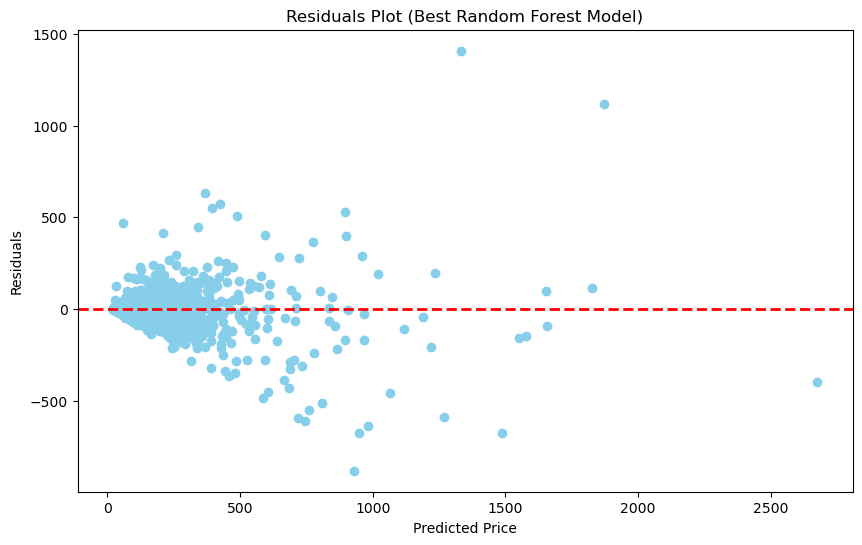

In [29]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot (Best Random Forest Model)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()


In [30]:
# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization parameter alpha
ridge_model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse_ridge)

# Calculate root mean squared error (RMSE)
rmse_ridge = mean_squared_error(y_test, y_pred, squared=False)
print("Ridge Regression RMSE:", rmse_ridge)

# Calculate mean absolute error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred)
print("Ridge Regression MAE:", mae_ridge)

Ridge Regression MSE: 18744.15081395613
Ridge Regression RMSE: 136.9092795027281
Ridge Regression MAE: 76.95182374818657


In [31]:
# Deploy the model for pricing predictions
# Now you can use the trained model to predict prices for new instances
# For example:
new_instance = X_test[99].reshape(1, -1)  # Assuming a single instance for demonstration
predicted_price = ridge_model.predict(new_instance)
print(f"Predicted Price for the new instance: {predicted_price[0]}")
print( y_test.iloc[99])

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared Score:", r2_rf)

Predicted Price for the new instance: 76.0924309694
112.0
Random Forest R-squared Score: 0.5596158202960599


In [32]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Adjust the range of alpha values as needed

# Initialize Ridge Regression model
ridge_model = Ridge()

# Initialize GridSearchCV with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Predict prices on the test set using the best model
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse_ridge)

# Calculate root mean squared error (RMSE)
rmse_ridge = mean_squared_error(y_test, y_pred, squared=False)
print("Ridge Regression RMSE:", rmse_ridge)

# Calculate mean absolute error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred)
print("Ridge Regression MAE:", mae_ridge)

# Calculate R-squared score
r2_ridge = best_ridge_model.score(X_test, y_test)
print("Ridge Regression R-squared Score:", r2_ridge)


Best Hyperparameters: {'alpha': 10.0}
Ridge Regression MSE: 18735.95588852391
Ridge Regression RMSE: 136.87934792555052
Ridge Regression MAE: 76.91762732204715
Ridge Regression R-squared Score: 0.5598083558528864


In [33]:
# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
# Calculate mean squared error (MSE)
mse_gb = mean_squared_error(y_test, y_pred)
print("Gradient Boosting MSE:", mse_gb)

# Calculate root mean squared error (RMSE)
rmse_gb = mean_squared_error(y_test, y_pred, squared=False)
print("Gradient Boosting RMSE:", rmse_gb)

# Calculate mean absolute error (MAE)
mae_gb = mean_absolute_error(y_test, y_pred)
print("Gradient Boosting MAE:", mae_gb)

Gradient Boosting MSE: 21189.156139675113
Gradient Boosting RMSE: 145.56495505332015
Gradient Boosting MAE: 59.12454144305389


In [34]:
# Deploy the model for pricing predictions
# Now you can use the trained model to predict prices for new instances
# For example:
new_instance = X_test[99].reshape(1, -1)  # Assuming a single instance for demonstration
predicted_price = gb_model.predict(new_instance)
print(f"Predicted Price for the new instance: {predicted_price[0]}")
print(y_test.iloc[99])

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared Score:", r2_rf)

Predicted Price for the new instance: 119.27538777171054
112.0
Random Forest R-squared Score: 0.5021716780980137


In [35]:
from sklearn.model_selection import GridSearchCV, KFold

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with Gradient Boosting Regressor and parameter grid
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Predict prices on the test set using the best model
y_pred = best_gb_model.predict(X_test)

# Evaluate the best model
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = mean_squared_error(y_test, y_pred, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred)
r2_gb = best_gb_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Gradient Boosting MSE:", mse_gb)
print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting MAE:", mae_gb)
print("Gradient Boosting R-squared Score:", r2_gb)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting MSE: 10854.470190126414
Gradient Boosting RMSE: 104.18478866958657
Gradient Boosting MAE: 52.64821076336318
Gradient Boosting R-squared Score: 0.7449798073946035


In [36]:
# Train a Support Vector Regressor
svr_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for SVR
svr_model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
# Calculate mean squared error (MSE)
mse_svr = mean_squared_error(y_test, y_pred)
print("SVR MSE:", mse_svr)

# Calculate root mean squared error (RMSE)
rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
print("SVR RMSE:", rmse_svr)

# Calculate mean absolute error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred)
print("SVR MAE:", mae_svr)

SVR MSE: 34899.19167137094
SVR RMSE: 186.813253468192
SVR MAE: 74.2092940068777


In [37]:
# Deploy the model for pricing predictions
# Now you can use the trained model to predict prices for new instances
# For example:
new_instance = X_test[99].reshape(1, -1)  # Assuming a single instance for demonstration
predicted_price = svr_model.predict(new_instance)
print(f"Predicted Price for the new instance: {predicted_price[0]}")
print(y_test.iloc[99])

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared Score:", r2_rf)

Predicted Price for the new instance: 119.01067472193941
112.0
Random Forest R-squared Score: 0.18006144695100823


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],          # Penalty parameter C of the error term
    'epsilon': [0.1, 0.2, 0.5],  # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' kernel
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_svr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict prices on the test set using the best model
y_pred_best = best_svr_model.predict(X_test)

# Evaluate the best model
mse_best_svr = mean_squared_error(y_test, y_pred_best)
rmse_best_svr = mean_squared_error(y_test, y_pred_best, squared=False)
mae_best_svr = mean_absolute_error(y_test, y_pred_best)
r2_best_svr = best_svr_model.score(X_test, y_test)

print("Best SVR Model Parameters:", best_params)
print("Best SVR MSE:", mse_best_svr)
print("Best SVR RMSE:", rmse_best_svr)
print("Best SVR MAE:", mae_best_svr)
print("Best SVR R-squared Score:", r2_best_svr)


Best SVR Model Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}
Best SVR MSE: 24716.007712193074
Best SVR RMSE: 157.2132555231685
Best SVR MAE: 62.14356669777
Best SVR R-squared Score: 0.41931011493002823


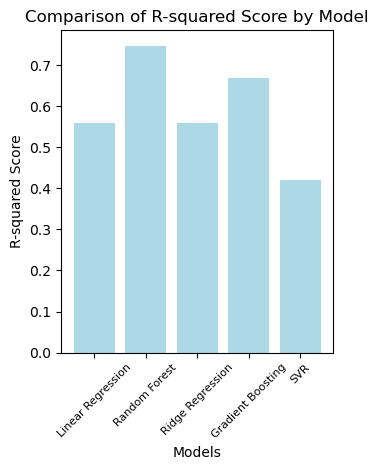

In [44]:
import matplotlib.pyplot as plt

# Models
models = ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Gradient Boosting', 'SVR']

# Metrics
mse = [18745.07, 10736.57, 18735.96, 14057.74, 24716.01]
rmse = [136.91, 103.62, 136.88, 118.57, 157.21]
mae = [76.96, 52.06, 76.92, 54.26, 62.14]
r_squared = [0.5596, 0.7477, 0.5598, 0.6697, 0.4193]

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plotting MSE, RMSE, and MAE
# plt.subplot(1, 2, 1)
# plt.bar(models, mse, color='skyblue', label='MSE')
# plt.bar(models, rmse, color='orange', label='RMSE')
# plt.bar(models, mae, color='green', label='MAE')
# plt.title('Comparison of Errors by Model')
# plt.xlabel('Models')
# plt.ylabel('Error Values')
# plt.legend()
# plt.xticks(rotation=45)

# Plotting R-squared
plt.subplot(1, 2, 2)
plt.bar(models, r_squared, color='lightblue')
plt.title('Comparison of R-squared Score by Models', fontsize=12)
plt.xlabel('Models', fontsize=10)
plt.ylabel('R-squared Score', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


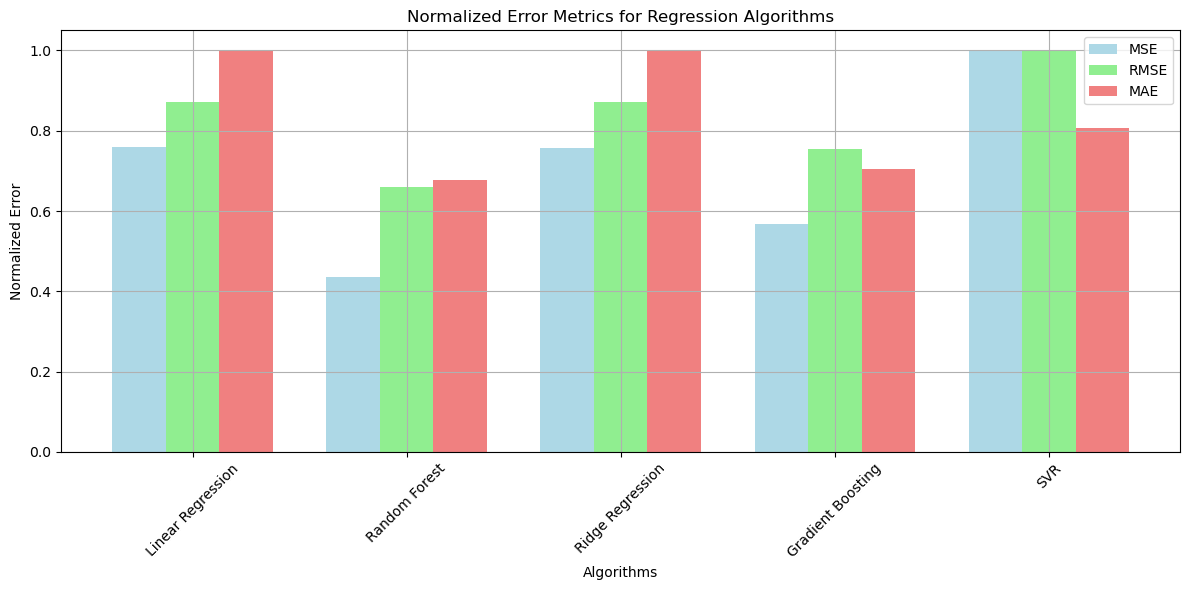

In [40]:
# Error metrics for each algorithm
mse = [18745.07, 10736.57, 18735.96, 14057.74, 24716.01]
rmse = [136.91, 103.62, 136.88, 118.57, 157.21]
mae = [76.96, 52.06, 76.92, 54.26, 62.14]

# Normalize the errors
max_mse = max(mse)
max_rmse = max(rmse)
max_mae = max(mae)

mse_values_normalized = [error / max_mse for error in mse]
rmse_values_normalized = [error / max_rmse for error in rmse]
mae_values_normalized = [error / max_mae for error in mae]

# Algorithms
algorithms = ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Gradient Boosting', 'SVR']
x = np.arange(len(algorithms))

# Plotting normalized errors for each algorithm
plt.figure(figsize=(12, 6))

bar_width = 0.25

# Plotting MSE
plt.bar(x - bar_width, mse_values_normalized, width=bar_width, label='MSE', color='lightblue', align='center')
# Plotting RMSE
plt.bar(x, rmse_values_normalized, width=bar_width, label='RMSE', color='lightgreen', align='center')
# Plotting MAE
plt.bar(x + bar_width, mae_values_normalized, width=bar_width, label='MAE', color='lightcoral', align='center')

plt.title('Normalized Error Metrics for Regression Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Normalized Error')
plt.xticks(x, algorithms, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
